<a href="https://colab.research.google.com/github/srirakshareddy/FinTech-using-the-AI-Gym-RL-Trading-Algorithms/blob/main/Sriraksha_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import dependencies

In [ ]:
!pip install tensorflow==1.15 tensorflow-gpu==1.15 stable-baselines gym-anytrading gym

     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 411.5 MB 7.8 kB/s 
     |████████████████████████████████| 240 kB 38.3 MB/s 
     |████████████████████████████████| 171 kB 62.5 MB/s 
     |████████████████████████████████| 50 kB 4.9 MB/s 
     |████████████████████████████████| 503 kB 39.6 MB/s 
     |████████████████████████████████| 3.8 MB 47.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f78283c3b90dfa506e223c96c7d0ccf584dbc7b24a7d7b611a729ab6446cb5a1
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [ ]:
import subprocess
import sys
subprocess.check_call([sys.executable, "-m",
    "pip", "install", "--user", "tensorflow==1.15.0"])

0

In [ ]:
import tensorflow as tf

In [ ]:
!pip install tensorflow-gpu==1.15

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
print(tf.__version__)

1.15.0


In [ ]:
!pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
!pip install numpy pandas matplotlib

In [ ]:
# Importing Gym
import gym
import gym_anytrading

# Importing Stable baselines - rl 
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# 1. Using Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [ ]:
df = pd.read_csv('//content/MSFT (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,18-08-21,292.040009,294.820007,290.269989,290.730011,289.600281,21813000
1,19-08-21,288.690002,297.470001,288.640015,296.769989,295.616760,29850500
2,20-08-21,299.720001,305.839996,298.059998,304.359985,303.177277,40796100
3,23-08-21,303.250000,305.399994,301.850006,304.649994,303.466187,22830200
4,24-08-21,305.019989,305.649994,302.000000,302.619995,301.444061,18175800


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2021-08-18,292.040009,294.820007,290.269989,290.730011,289.600281,21813000
2021-08-19,288.690002,297.470001,288.640015,296.769989,295.616760,29850500
2021-08-20,299.720001,305.839996,298.059998,304.359985,303.177277,40796100
2021-08-23,303.250000,305.399994,301.850006,304.649994,303.466187,22830200
2021-08-24,305.019989,305.649994,302.000000,302.619995,301.444061,18175800


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [ ]:
env.signal_features

array([[ 2.90730011e+02,  0.00000000e+00],
       [ 2.96769989e+02,  6.03997800e+00],
       [ 3.04359985e+02,  7.58999600e+00],
       [ 3.04649994e+02,  2.90009000e-01],
       [ 3.02619995e+02, -2.02999900e+00],
       [ 3.02010010e+02, -6.09985000e-01],
       [ 2.99089996e+02, -2.92001400e+00],
       [ 2.99720001e+02,  6.30005000e-01],
       [ 3.03589996e+02,  3.86999500e+00],
       [ 3.01880005e+02, -1.70999100e+00],
       [ 3.01829987e+02, -5.00180000e-02],
       [ 3.01149994e+02, -6.79993000e-01],
       [ 3.01140015e+02, -9.97900000e-03],
       [ 3.00179993e+02, -9.60022000e-01],
       [ 3.00209991e+02,  2.99980000e-02],
       [ 2.97250000e+02, -2.95999100e+00],
       [ 2.95709991e+02, -1.54000900e+00],
       [ 2.96989990e+02,  1.27999900e+00],
       [ 2.99790009e+02,  2.80001900e+00],
       [ 3.04820007e+02,  5.02999800e+00],
       [ 3.05220001e+02,  3.99994000e-01],
       [ 2.99869995e+02, -5.35000600e+00],
       [ 2.94299988e+02, -5.57000700e+00],
       [ 2.

# 2. Building Environment

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 24.570040000000063, 'total_profit': 0.7657455515531387, 'position': 0}


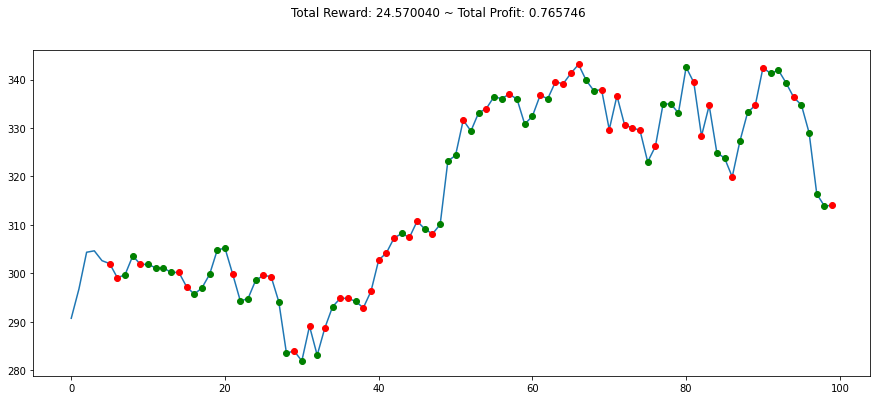

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Building Environment and Training model

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=25000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.00252 |
| fps                | 16       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.6      |
---------------------------------
---------------------------------
| explained_variance | 0.00125  |
| fps                | 333      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 77.3     |
---------------------------------
---------------------------------
| explained_variance | -0.464   |
| fps                | 373     

# 4. Evaluation

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -1.0499879999999848, 'total_profit': 0.9816325517928146, 'position': 1}


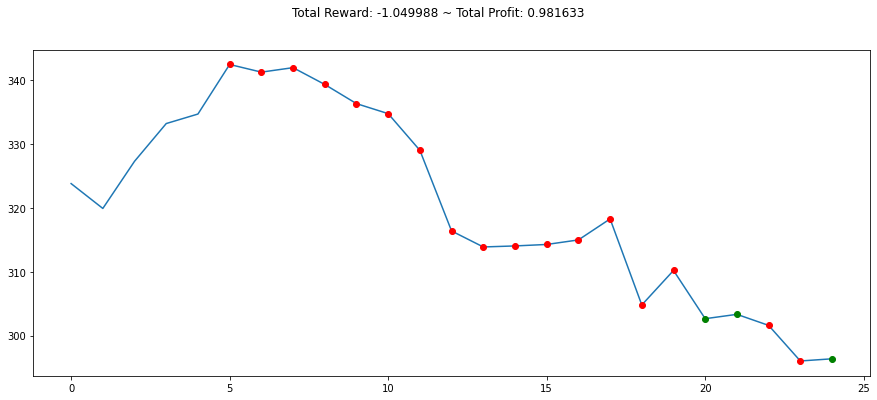

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import ACKTR

env_maker2 = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker2])

In [ ]:
model = ACKTR('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=25000)












---------------------------------
| explained_variance | -0.00216 |
| fps                | 16       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| policy_loss        | 3.46     |
| total_timesteps    | 20       |
| value_loss         | 35.9     |
---------------------------------
----------------------------------
| explained_variance | -0.000746 |
| fps                | 22        |
| nupdates           | 100       |
| policy_entropy     | 0.692     |
| policy_loss        | -3.4      |
| total_timesteps    | 2000      |
| value_loss         | 46.6      |
----------------------------------
---------------------------------
| explained_variance | 0.000174 |
| fps                | 21       |
| nupdates           | 200      |
| policy_entropy     | 0.592    |
| policy_loss        | 13       |
| total_timesteps    | 4000     |
| value_loss         | 402      |
---------------------------------
---------------------------------
| explained_variance | 0.004

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -35.999999, 'total_profit': 0.8432000889345194, 'position': 1}


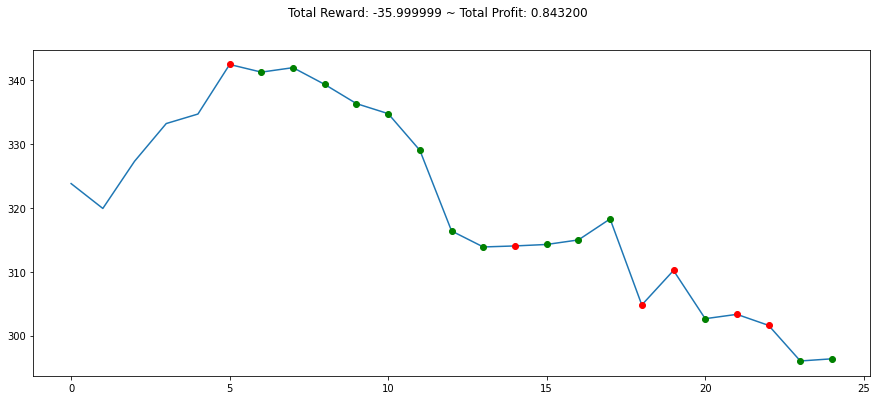

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()